## How to use 2D velocity estimate functions

This notebook shows how to use `two_dim_velocity_estimates.py` to get a 2D velocity field for experimental data (APD) using a time delay estimation method based on either
- cross correlation 
- cross conditional average 

APD stands for Avalanche Photodiodes which is a gas puff imaging diagnotic consisiting of 9x10 array of toroidal views of a localized gas puff.

Documentation on how to generate raw apd dataset: https://github.com/sajidah-ahmed/cmod_functions/blob/main/guides/how_to_use_raw_APD_datatset_function.ipynb

Documentation on xarray can be found here: https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html

In [2]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import fppanalysis.two_dim_velocity_estimates as tdve

For experimental data:

(Note: Experimental data should be normalized. --> Normalize xarray dataset. Include LCFS and limiter position)

In [4]:
path = Path("/Users/ahe104/Box/mfe_data/raw_apd_data") # Change this to your path
shot = 1111208034
ds = xr.open_dataset(str(path) + "/" + f"apd_signal_array_{shot}.nc")   # Data is already extraced from the MDS tree

<xarray.Dataset>
Dimensions:  (y: 10, x: 9, time: 782960)
Coordinates:
    R        (y, x) float32 ...
    Z        (y, x) float32 ...
  * time     (time) float64 1.104 1.104 1.104 1.104 ... 1.496 1.496 1.496 1.496
Dimensions without coordinates: y, x
Data variables:
    frames   (y, x, time) float64 ...

## Cross correlation

`estimate_velocity_field()` will return a class containing estimated velocity data of all pixels

method = 'cross_corr' is set as default

In [5]:
movie_data = tdve.estimate_velocity_field(ds)

/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (0, 1) is dead and cannot be used as a neighbor pixel of (0, 0). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (1, 2) is dead and cannot be used as a neighbor pixel of (0, 2). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (0, 1) is dead and cannot be used as a neighbor pixel of (0, 2). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (0, 5) is dead and cannot be used as a neighbor pixel of (0, 4). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (0, 7) is dead and cannot be used as a neighbor pixel of (0, 6). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/

/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (8, 8) is dead and cannot be used as a neighbor pixel of (6, 8). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (6, 9) is dead and cannot be used as a neighbor pixel of (6, 8). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (8, 2) is dead and cannot be used as a neighbor pixel of (7, 2). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (7, 3) is dead and cannot be used as a neighbor pixel of (7, 2). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (8, 4) is dead and cannot be used as a neighbor pixel of (7, 4). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/

/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (0, 9) is dead and cannot be used as a neighbor pixel of (2, 9). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (3, 9) is dead and cannot be used as a neighbor pixel of (2, 9). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (2, 0) is dead and cannot be used as a neighbor pixel of (3, 0). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (3, 2) is dead and cannot be used as a neighbor pixel of (3, 1). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/fppanalysis/two_dim_velocity_estimates.py:342: UserWarning: Pixel (3, 2) is dead and cannot be used as a neighbor pixel of (3, 3). Updating.
  warnings.warn(
/home/sosno/Git/fpp-analysis-tools/

Extract estimated velocities and their confidences for each pixel

Confindeces are given as the maximum value of the cross correlation function at which the time lag is computed

In [6]:
vx = movie_data.get_vx()
vy = movie_data.get_vy()
confidences = movie_data.get_confidences()
R = movie_data.get_R()
Z = movie_data.get_Z()

In [7]:
R_coordinates, Z_coordinates = tdve._get_rz_full(ds)

Use quiver to plot the velocity field.

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


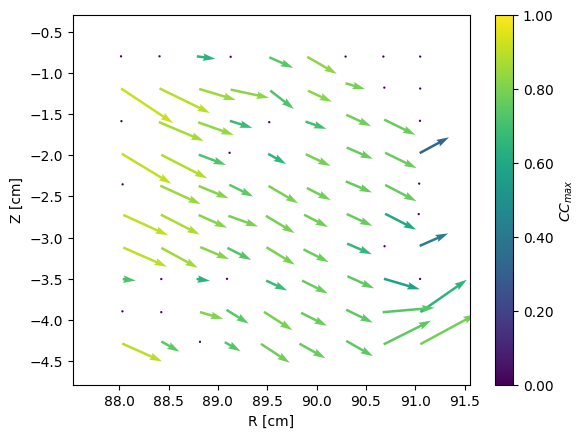

In [8]:
plt.rcParams["mathtext.fontset"] = "custom"

fig, ax = plt.subplots()
norm = mpl.colors.Normalize(vmin=0, vmax=1)
qiv = ax.quiver(
    R,
    Z,
    vx,
    vy,
    confidences,
    scale=210000,   # Scale arrows
    scale_units="xy",
    angles="xy",
    norm=norm,
)
cbar = fig.colorbar(qiv, format="%.2f")    
cbar.ax.set_ylabel(r"$CC_{max} $")
ax.set_xlabel("R [cm]")
ax.set_ylabel("Z [cm]")
ax.set_ylim(min(Z_coordinates[0]) - 0.5, max(Z_coordinates[0] + 0.5))
ax.set_xlim([min(R_coordinates[:, 0]) - 0.5, max(R_coordinates[:, 0]) + 0.5])
plt.show()

## Cross conditional average

To use cross conditional average, we need to change the default estimation options. To do that we instantiate an object of type EstimationOptions with method as "cond_av". The following parameters might then be relevant to set to non-default values aswell:

- min_threshold: Lowest threshold for conditional average method
- max_threshold: Maxiumum threshold for conditional average method
- delta: If window = True, delta is the minimal distance between two peaks.
- window: [bool] If True, delta also gives the minimal distance between peaks.


In [10]:
method = 'cond_av'
min_threshold = 2.5
max_threshold = np.inf
delta = 1.1e-4
window = True
estimation_options = tdve.EstimationOptions(method=method, min_threshold=min_threshold, max_threshold=max_threshold, delta=delta, window=window)

movie_data = tdve.estimate_velocity_field(
    ds,
    estimation_options
)

Extract estimated velocities and their confidences for each pixel

Confidences of the estimation is a value in the interval (0, 1) given by the
cross conditional variance for each event. OBS: We return 1-CV for cross conditional variance.

From conditional averaging we also obtain number of events for each average. This is another variable contained in the class. 

In [13]:
vx = movie_data.get_vx()
vy = movie_data.get_vy()
confidences = movie_data.get_confidences()
R = movie_data.get_R()
Z = movie_data.get_Z()
events = movie_data.get_events()

Use quiver to plot the velocity field. Here, number of events are plotted as the third dimension shown in the colorbar

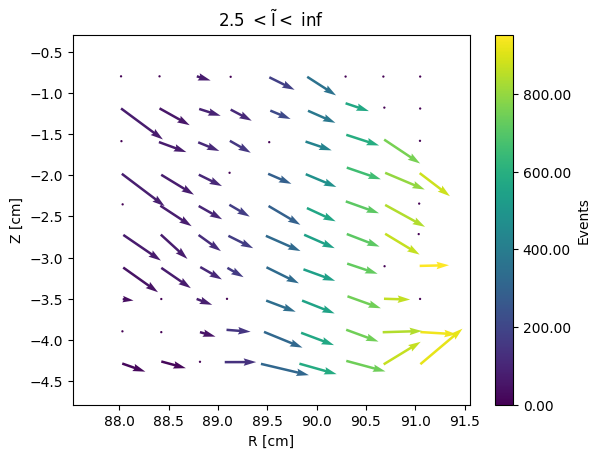

In [14]:
fig, ax = plt.subplots()

qiv = ax.quiver(
    R,
    Z,
    vx,
    vy,
    events,
    scale=210000, # Scale arrows
    scale_units="xy",
    angles="xy",
)
cbar = fig.colorbar(qiv, format="%.2f")    
cbar.ax.set_ylabel("Events")
ax.set_xlabel("R [cm]")
ax.set_ylabel("Z [cm]")
ax.set_xlim([min(R_coordinates[:, 0]) - 0.5, max(R_coordinates[:, 0]) + 0.5])
ax.set_ylim(min(Z_coordinates[0]) - 0.5, max(Z_coordinates[0] + 0.5))
ax.set_title(
    f"{min_threshold} "
    r"$ < \tilde{\mathrm{I}} < $ "
    f"{max_threshold}"
)
plt.show()